In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.insert(0, 'c:/Kitti/Dropbox/PHD/IASS 2018/Tekno')
import Tekno as tk
import Types as tp
import numpy as np
import Plot as ptk
from scipy.interpolate import UnivariateSpline
from plotly.graph_objs import Layout, Data, Figure, Marker
from plotly.graph_objs import Scatter3d, Scatter, Histogram
from plotly import tools
from plotly.offline import iplot as iplt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from scipy import optimize
import pickle
import pandas as pd

In [2]:
import importlib #for reloading
importlib.reload(tk)
import Tekno as tk

## Parameters

Itt mar csak azokat a szerkezeteket+szelvenyeket nezem, melyeknek gyakorlati jelentosege van : teherbirasuk 5-20 kN/m^2

In [19]:
runNb=3
GeomType = 3 # Kiewitt
LperHA = np.zeros(runNb, dtype=np.int16)
gNA    = np.zeros(runNb, dtype=np.int16)
gRA    = np.zeros(runNb, dtype=np.int16)
SpanA  = np.zeros(runNb, dtype=np.int16)
DStart = np.zeros(runNb)
DStep  = np.zeros(runNb)
tStart = np.zeros(runNb, dtype=np.int16)
tStep  = np.zeros(runNb, dtype=np.int16)
FA     = np.zeros(runNb)
GData   = np.zeros((runNb,9), dtype=np.int16)

GData[0]  = 45.14/5,    6, 9, 45.14, 115,  50,  5,  5,  -60   # H=5
GData[1]  = 45.14/8,    6, 9, 45.14, 100,  50,  5,  5,  -100  # H=8
GData[2]  = 45.14/13.3, 6, 9, 45.14, 80,   50,  5,  5,  -120  # H=13.3

for i in range(runNb):
    LperHA[i], gNA[i], gRA[i], SpanA[i], DStart[i] = GData[i,0], GData[i,1], GData[i,2], GData[i,3], GData[i,4]
    DStep[i], tStart[i], tStep[i], FA[i]           = GData[i,5], GData[i,6], GData[i,7], GData[i,8]

In [20]:
MatNL = True
n=1 # mm CHS cross-section diameter
m=1 # mm CHS cross-section thickness
nb = 4   # number of finite elements along one beam

In [21]:
size = 50
GRSA       = np.zeros(size, dtype=tp.GridShell)
CapacityFAp = np.zeros((size, n*m))
CapacityAp  = np.zeros((size, n*m))
rhoAAp      = np.zeros((size, n*m))
IDAp        = np.zeros(size, dtype=np.int16)
etaAp       = np.zeros((size, n*m)) 
loadAAp     = np.zeros((size, n*m, 51))
dispAp      = np.zeros((size, n*m, 51))
CapacityFA  = np.zeros((size, n*m))
CapacityA   = np.zeros((size, n*m))
rhoAA       = np.zeros((size, n*m))
IDA         = np.zeros(size, dtype=np.int16)
etaA        = np.zeros((size, n*m)) 
loadAA      = np.zeros((size, n*m, 51))
dispA       = np.zeros((size, n*m, 51))

## Analysis

In [22]:
i=0
GRSA[i], CapacityFAp[i], CapacityAp[i], rhoAAp[i], etaAp[i], loadAAp[i], dispAp[i] = tk.loop_analyse2(n, m, LperHA[i], gNA[i], SpanA[i], nb, FA[i], DStart[i], DStep[i], tStart[i], tStep[i], suptype=0, geomtype=3,gR=gRA[i])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning:

Covariance of the parameters could not be estimated



2.568 2.575 2.588 2.584 2.586 2.570 2.582 2.575 2.570 
2.580 2.579 2.579 2.579 2.579 2.579 2.580 2.580 2.578 


In [29]:
CapacityFAp[0:3]

array([[ 31.2],
       [  0. ],
       [  0. ]])

In [26]:
i=0
amp=SpanA[i]/1000
GRSA[i], CapacityFA[i], CapacityA[i], rhoAA[i], etaA[i], loadAA[i], dispA[i] = tk.loop_analyse_imp(n, m, LperHA[i], gNA[i], SpanA[i], nb, FA[i], DStart[i], DStep[i], tStart[i], tStep[i],amp,suptype=0, geomtype=3,gR=gRA[i])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning:

Covariance of the parameters could not be estimated



2.568 2.575 2.588 2.584 2.586 2.570 2.582 2.575 2.570 
2.580 2.579 2.579 2.579 2.579 2.579 2.580 2.580 2.578 
57.98


In [28]:
CapacityFA[0:3]

array([[ 21.],
       [  0.],
       [  0.]])

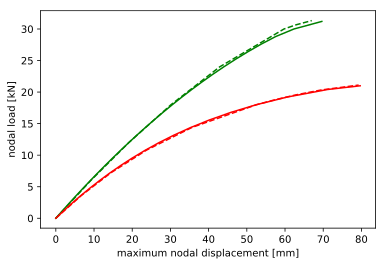

In [50]:
axisD=np.array([0,-9.167,-19.113,-30.150,-42.904,-59.728,-62.911,-67.002])
axisL=np.array([0,0.15,0.3,0.45,0.6,0.75,0.76667,0.78333])
axisDi=np.array([0,-6.659,-14.398,-23.733,-35.664,-52.538,-57.347,-62.827,-69.468,-79.277])
axisLi=np.array([0,0.144,0.288,0.432,0.576,0.72,0.75111,0.78222,0.81333,0.84444])
j=0
for i in range(n*m):
    plot = plt.plot(-axisD,40*axisL,'g--') # dot plot
    plot = plt.plot(-axisDi,25*axisLi,'r--') # dot plot
    plot = plt.plot(dispAp[j,i],loadAAp[j,i],'g') # dot plot
    plot = plt.plot(dispA[j,i],loadAA[j,i],'r') # dot plot
plot = plt.xlabel('maximum nodal displacement [mm]')
plot = plt.ylabel('nodal load [kN]')

In [ ]:
CapacityA[0]/CapacityAp[0]

# Save/Load results

### Save

In [30]:
pickle.dump(GRSA, open( "c:/Kitti/Dropbox/PHD/IASS 2018/Tekno/GRSA_OldalnyomasosALL_Geom3_Kiewitt_valid.p", "wb" ) )

In [36]:
A_df  = pd.DataFrame(CapacityA)
B_df  = pd.DataFrame(CapacityFA)
C_df  = pd.DataFrame(rhoAA)
D_df  = pd.DataFrame(etaA)
E_df1 = pd.DataFrame(loadAA[:,0,:]) #sec1
F_df1 = pd.DataFrame(dispA[:,0,:])  #sec1

with pd.HDFStore('c:/Kitti/Dropbox/PHD/IASS 2018/Tekno/OldalnyomasosALL_Geom3_Kiewitt_valid.h5') as store:
    store['CapacityA'] = A_df
    store['CapacityFA']= B_df
    store['rhoAA']     = C_df
    store['etaA']      = D_df
    store['loadA1']    = E_df1
    store['dispA1']    = F_df1

## Load

In [37]:
ga = pickle.load( open( "c:/Kitti/Dropbox/PHD/IASS 2018/Tekno/GRSA_OldalnyomasosALL_Geom3_Kiewitt_valid.p", "rb" ) )
with pd.HDFStore('c:/Kitti/Dropbox/PHD/IASS 2018/Tekno/OldalnyomasosALL_Geom3_Kiewitt_valid.h5') as store:
    ca = store['CapacityA']
    cf = store['CapacityFA']
    rh = store['rhoAA']
    et = store['etaA']
    l1 = store['loadA1']
    d1 = store['dispA1']

In [38]:
size = 50
GRSA = ga
CapacityA  = ca.values
CapacityFA = cf.values
rhoAA      = rh.values
etaA       = et.values
loadAA     = np.zeros((size, n*m, 51))
loadAA[:,0,:]  = l1.values
dispA      = np.zeros((size, n*m, 51))
dispA[:,0,:]   = d1.values